## Load a test phantom

Some circles and elongated rectangles to test filtering based on circularity and area

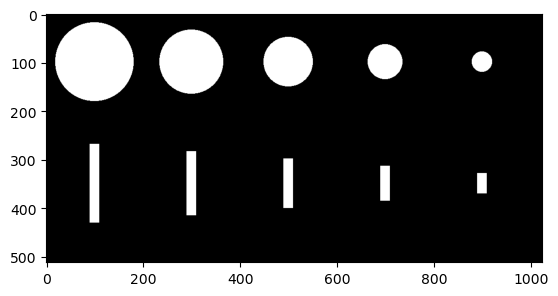

In [29]:
from skimage.io import imread
from matplotlib import pyplot as plt

img = imread('phantom.tiff')
plt.imshow(img, cmap='gray')

# Segment and label (count discrete objects) in the image

This is trivial for our phantom (no noise, no blur, objects far from each other), but would be potentially more involved for real images.

Here we use an Otsu threshold to binarize the objects then label (count them).  These two steps might work on a real image, or maybe not.  There are lots of questions about this on the image.sc forum for the cases where simple image processing doesn't do it. 

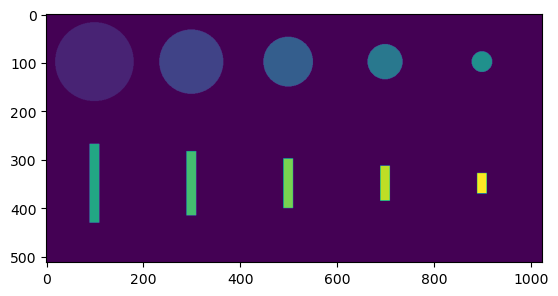

In [30]:
# import otsu threshold
from skimage.filters import threshold_otsu
thresholded = img > threshold_otsu(img)

# import label
from skimage.measure import label
labeled = label(thresholded)

plt.imshow(labeled)

## Use region props to measure the labels

I don't think the regions have circularity by default, so we need to calculate it ourselves. 

In [31]:
import math
from skimage.measure import regionprops
props = regionprops(labeled)

for region in props:
    cirularity = (4 * math.pi * region.area) / (region.perimeter * region.perimeter)
    print(region.area, region.perimeter, region.eccentricity, cirularity)

20636.0 533.8721497261419 0.0 0.9098312545029754
13692.0 434.9604614807105 0.0 0.9094465775605028
8184.0 336.048773235279 0.0 0.9106906046069907
4060.0 234.79393923933998 0.0 0.9254695480062558
1396.0 135.88225099390854 0.0 0.9501010913471641
3240.0 360.0 0.9923688556103972 0.3141592653589793
2640.0 300.0 0.9884833011443448 0.36861353802120234
2040.0 240.0 0.9806353446266456 0.44505895925855404
1440.0 180.0 0.9607380274555545 0.5585053606381855
840.0 120.0 0.8795915104094314 0.7330382858376184


## Filter out some objects from the image

This step zeros out the labels of objects that we don't want (too small or not circular enough)

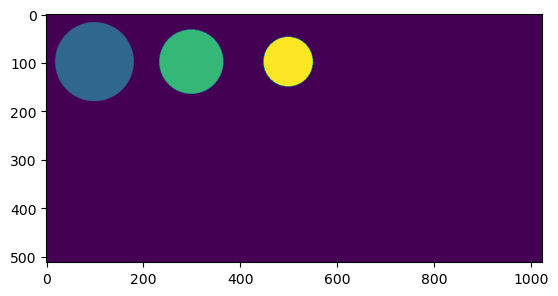

In [32]:
labeled_filtered=labeled.copy()

min_circularity = 0.9
min_area = 5000

for region in props:

    circularity = (4*math.pi*region.area)/(region.perimeter**2)
    if circularity < min_circularity or region.area < min_area:
        labeled_filtered[labeled_filtered==region.label]=0

plt.imshow(labeled_filtered)

## Convert to Pandas

This is sometimes useful if you are familiar with the pandas library.  We can get our object properties in a dataframe and do pandas stuff (filtering, etc) with it

In [33]:
from skimage.measure import regionprops_table

props = regionprops_table(labeled, properties=('centroid','orientation','area','perimeter'))
import pandas as pd
df = pd.DataFrame(props)

# add cicularity to df
df['circularity'] = (4*math.pi*df['area'])/(df['perimeter']**2)

display(df)

,centroid-0,centroid-1,orientation,area,perimeter,circularity
0,99.5,99.5,-0.785398,20636.0,533.872150,0.909831
1,99.5,299.5,-0.785398,13692.0,434.960461,0.909447
2,99.5,499.5,-0.785398,8184.0,336.048773,0.910691
3,99.5,699.5,-0.785398,4060.0,234.793939,0.925470
4,99.5,899.5,-0.785398,1396.0,135.882251,0.950101
5,349.5,99.5,0.000000,3240.0,360.000000,0.314159
6,349.5,299.5,0.000000,2640.0,300.000000,0.368614
7,349.5,499.5,0.000000,2040.0,240.000000,0.445059
8,349.5,699.5,0.000000,1440.0,180.000000,0.558505
9,349.5,899.5,0.000000,840.0,120.000000,0.733038
